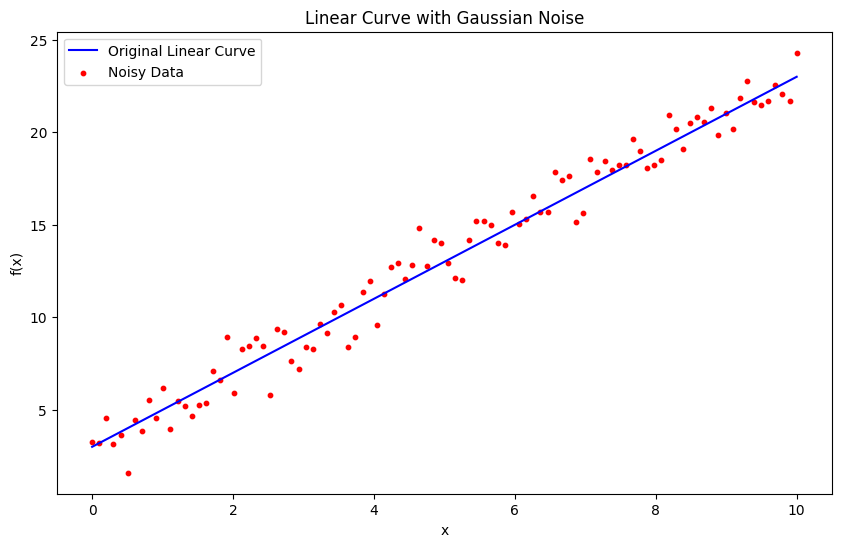

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear function
def linear_function(x):
    return 2 * x + 3

def noisy_function(f, args, mean, std_deviation):
    noise = np.random.normal(mean, std_deviation, args.shape)
    return f(args) + noise
    
# Generate x values
x = np.linspace(0, 10, 100).reshape(-1,1)

# Generate y values without noise
y = linear_function(x)

# Add Gaussian noise
mean = 0
std_deviation = 1
y_noisy = noisy_function(linear_function, x, mean, std_deviation)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Linear Curve', color='blue')
plt.scatter(x, y_noisy, label='Noisy Data', color='red', s=10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Linear Curve with Gaussian Noise')
plt.show()


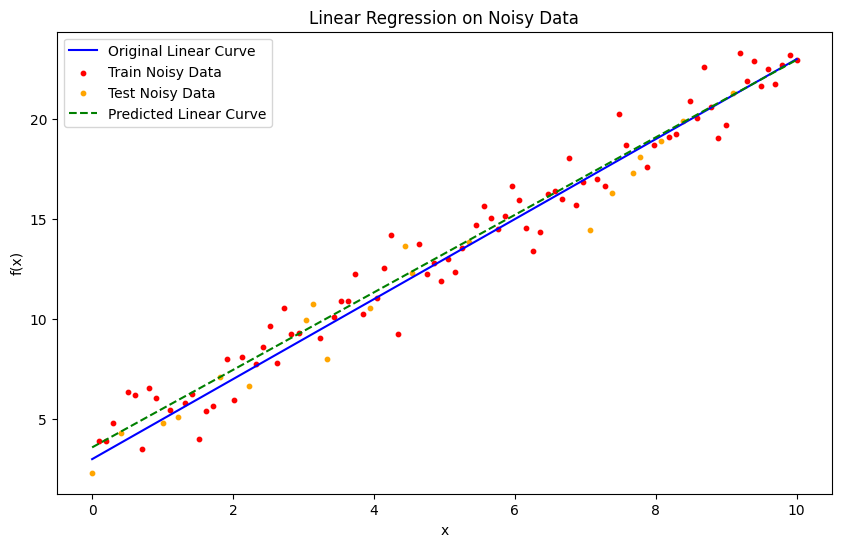

Intercept: 3.587641157198176
Coefficient: 1.9374472608213924


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = args
y = linear_function(x)
mean = 0
std_deviation = 1
y_noisy = noisy_function(linear_function, x, mean, std_deviation)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.2, random_state=42)

# Train a linear regression model using scikit-learn
model = LinearRegression()
model.fit(x_train, y_train)
    
# Predict y values
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
    
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Linear Curve', color='blue')
plt.scatter(x_train, y_train, label='Train Noisy Data', color='red', s=10)
plt.scatter(x_test, y_test, label='Test Noisy Data', color='orange', s=10)
plt.plot(x, model.predict(x), label='Predicted Linear Curve', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Linear Regression on Noisy Data')
plt.show()
    
# Print the coefficients
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")

Train Mean Squared Error: 1.1622435176914507
Test Mean Squared Error: 1.241573298133218


### Mean Squared Error (MSE)
The Mean Squared Error (MSE) is a measure of the average of the squares of the errors, which are the differences between the predicted and actual values. It is used to evaluate the performance of a regression model.

**Formula:**
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- $ n $: Number of data points.
- $ y_i $: Actual value.
- $ \hat{y}_i $: Predicted value by the model.

**Interpretation:**
- Lower MSE indicates a better fit of the model to the data.
- MSE is always non-negative, and values closer to zero are better.
